In [2]:
import tensorflow as tf
from tensorflow import keras
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as display
from PIL import Image 

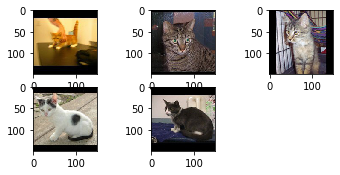

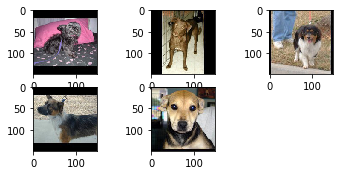

In [3]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataframe
path='train1000/'
# plot first few images
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename= path + "cat." + str(i) + ".jpg"
    # load image pixels
    image= imread(filename)
    #  plot row image data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# The same step for dogs
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename= path + "dog." + str(i) + ".jpg"
    # load image pixels
    image= imread(filename)
    #  plot row image data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [4]:
#Creating directories like that
#data
#├── test
#│   ├── cats
#│   └── dogs
#└── train
#    ├── cats
#    └── dogs

from os import makedirs
dataset_home = 'data/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

In [5]:
# All photos have diffrent size
# Let`s do them 150*150 pixels
from os import listdir
from numpy import asarray
from numpy import save
#conda install PIL     # Installed through the terminal
#conda install Pillow  # Installed through the terminal
from keras_preprocessing.image import load_img, img_to_array
from keras_preprocessing import image
from PIL import Image
import os, sys
import shutil 

# Resize images

from shutil import copyfile

path = "train1000/"
dirs = os.listdir( path )
final_size = 150;

def resize_aspect_fit():
    for item in dirs:
         if item == '.DS_Store':
             continue
         if os.path.isfile(path+item):
             im = Image.open(path+item)
             f, e = os.path.splitext(path+item)
             size = im.size
             ratio = float(final_size) / max(size)
             new_image_size = tuple([int(x*ratio) for x in size])
             im = im.resize(new_image_size, Image.ANTIALIAS)
             new_im = Image.new("RGB", (final_size, final_size))
             new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
             new_im.save(f + '.jpg', 'JPEG', quality=90)
resize_aspect_fit()

In [6]:
# Check a new photos size
for i in range(5):
    cats=Image.open(os.path.join(path + "cat." + str(i) + ".jpg"))
    
    width, height = cats.size
    print(width, height)
print(end='\n')
    
for i in range(5):
    dogs=Image.open(os.path.join(path + "dog." + str(i) + ".jpg"))
    
    width_dogs, height_dogs = dogs.size
    print(width_dogs, height_dogs)

150 150
150 150
150 150
150 150
150 150

150 150
150 150
150 150
150 150
150 150


In [7]:
# Put resized images (train data) into "data/train/cats/" and "data/train/dogs/"
import glob
import shutil
import os
import random
from shutil import copyfile
from random import seed
from random import random
# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.25

dataset_home = "data/"

# copy training dataset images into subdirectories
src_directory = 'train1000/'
for file in listdir(src_directory):
    src = src_directory + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

In [8]:
# See the folder
print(next( os.walk(dataset_home)))
print(next( os.walk('data/test')))
print(next( os.walk('data/train')))

('data/', ['test', 'train'], [])
('data/test', ['cats', 'dogs'], [])
('data/train', ['cats', 'dogs'], [])


In [ ]:
#from keras.models import Sequential
from tensorflow.keras.models import Sequential

In [ ]:
from keras.layers import Dense, Activation

In [ ]:
model = Sequential() 
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)))